<a href="https://colab.research.google.com/github/torontodeveloper/berkeley-ai-llm-foundations/blob/main/KevinKakollaHumanBrainClassification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Name: Kevin Kakolla
# Student Number: X257515

## Introduction

Our objective in this project is to use Deep learning and build a model that can detect and classify seizures and other types of harmful brain activity.

In this project, we will be using images electroencephalography with critically ill patients to detect seizures and other types of brain activity that can cause brain damage.



# Terminologies

We would be using couple of terminologies that are specific to this domain; we will only highlight key attribute information here, as details will be made available in Appendix.



*  EEG: A test that measures electrical activity in the brain using small, metal discs (electrodes) attached to the scalp is called "Electroencephalogram (EEG)"[1]


*  A seizure is usually defined as a sudden alteration of behavior due to a temporary change in the electrical functioning of the brain.[2]

*   Epilepsy: Epilepsy is a disorder of the brain characterized by repeated seizures. A seizure is usually defined as a sudden alteration of behavior due to a temporary change in the electrical functioning of the brain. [2]

* The right half of the brain controls the left side of the body, and the left half of the brain controls the right side of the body. For example, if a seizure starts from the right side of the brain in the area that controls movement in the thumb, then the seizure may begin with jerking of the left thumb or hand. [2]


*   In epilepsy the brain's electrical rhythms have a tendency to become imbalanced, resulting in recurrent seizures. [2]

*  In patients with seizures, the normal electrical pattern is disrupted by sudden and synchronized bursts of electrical energy that may briefly affect their consciousness, movements or sensations. [2]



Reference:


1.   https://www.mayoclinic.org/tests-procedures/eeg/about/pac-20393875#:~:text=An%20electroencephalogram%20(EEG)%20is%20a,lines%20on%20an%20EEG%20recording.
2.   https://www.aans.org/en/Patients/Neurosurgical-Conditions-and-Treatments/Epilepsy#:~:text=Epilepsy%20is%20a%20disorder%20of,electrical%20functioning%20of%20the%20brain.











*   A seizure is a sudden, uncontrolled burst of electrical activity in the brain.[3]

* This test is done to see how medicine is helping the electrical problems in your brain.[3]


3. https://www.hopkinsmedicine.org/health/conditions-and-diseases/epilepsy/evaluation-of-a-firsttime-seizure

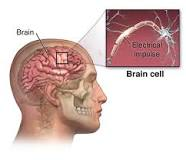

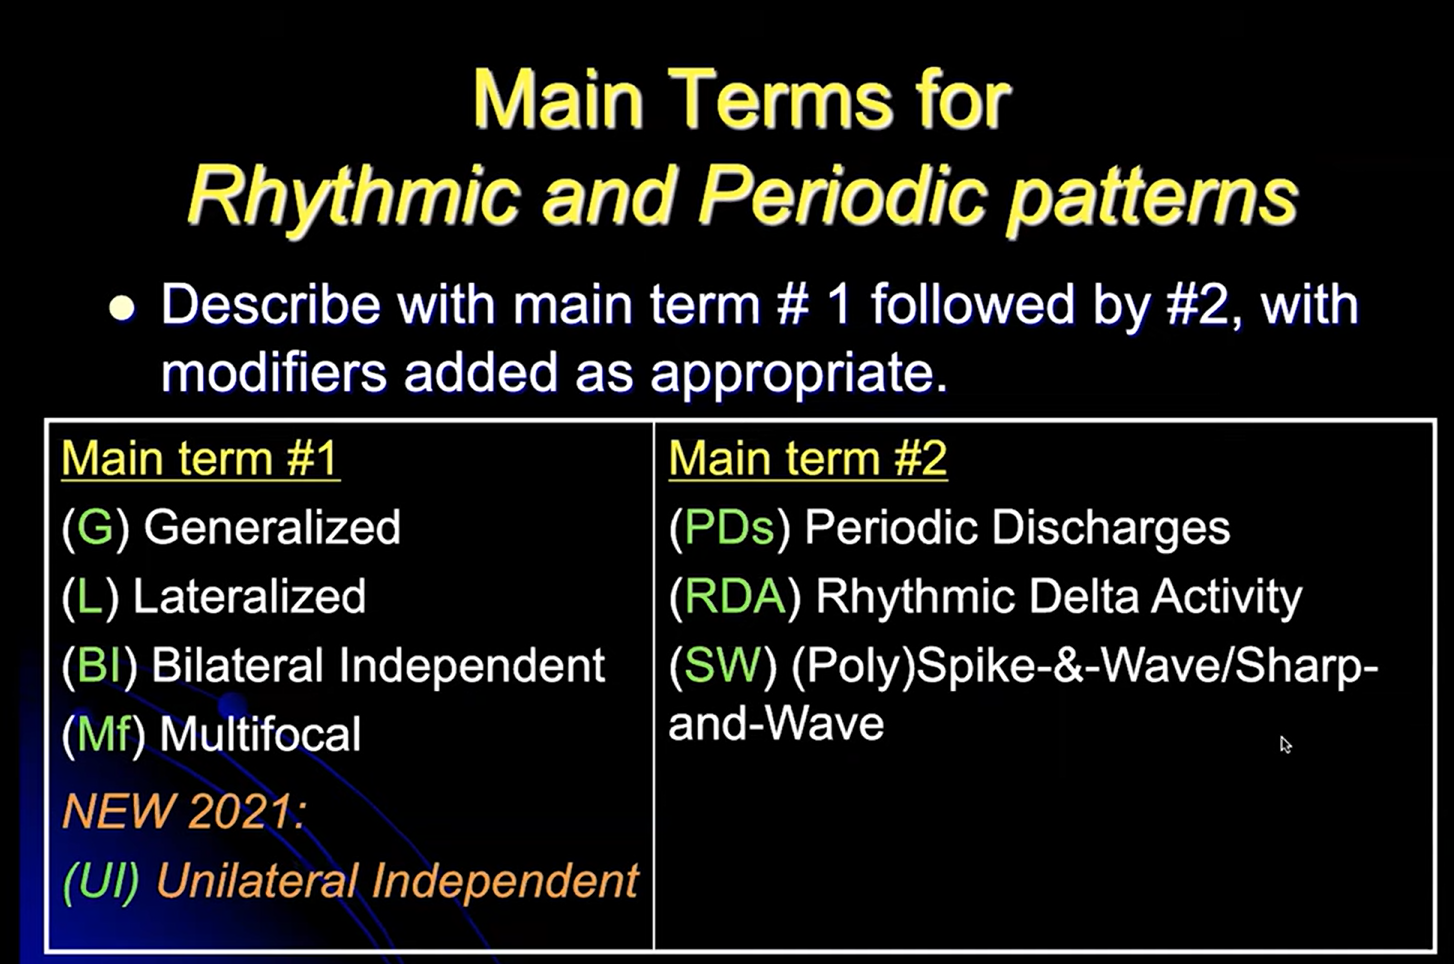

Rhythic Delta can be of 4 types:

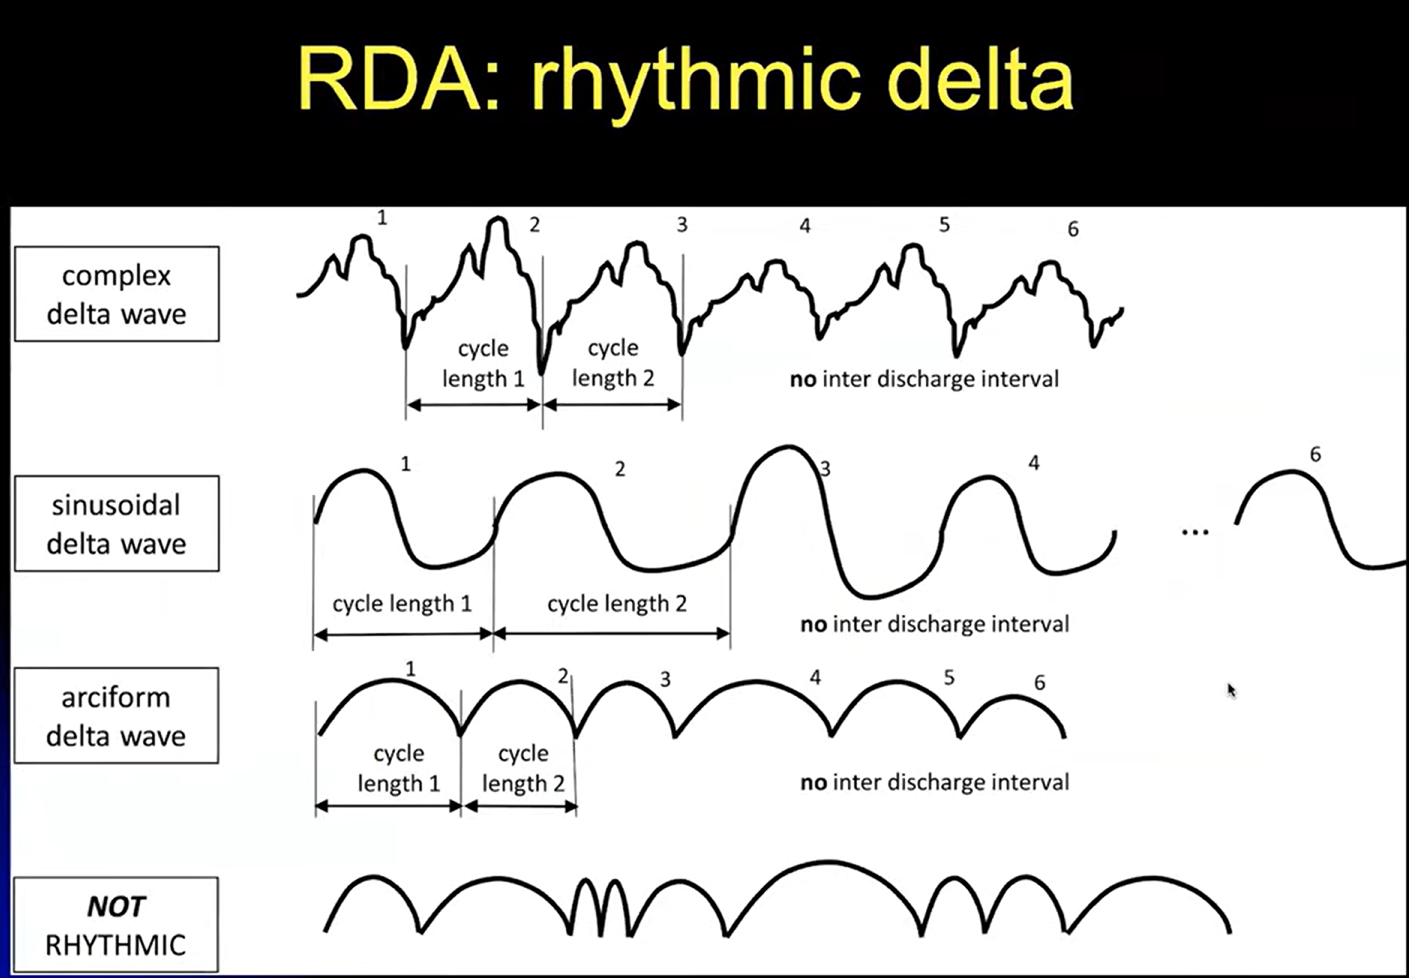


* train.csv : Metadata for the train set.

The expert annotators reviewed 50 second long EEG samples plus matched spectrograms covering 10 a minute window centered at the same time and labeled the central 10 seconds. Many of these samples overlapped and have been consolidated.


train.csv provides the metadata that allows you to extract the original subsets that the raters annotated.

* eeg_id - A unique identifier for the entire EEG recording.
* eeg_sub_id - An ID for the specific 50 second long subsample this row's labels apply to.
* eeg_label_offset_seconds - The time between the beginning of the consolidated EEG and this subsample.
* spectrogram_id - A unique identifier for the entire EEG recording.
* spectrogram_sub_id - An ID for the specific 10 minute subsample this row's labels apply to.
* spectogram_label_offset_seconds - The time between the beginning of the consolidated spectrogram and this subsample.
* label_id - An ID for this set of labels.
* patient_id - An ID for the patient who donated the data.
* expert_consensus - The consensus annotator label. Provided for convenience only.
* [seizure/lpd/gpd/lrda/grda/other]_vote - The count of annotator votes for a given brain activity class.


* test.csv Metadata for the test set.


> As there are no overlapping samples in the test set, many columns in the train metadata don't apply.



* eeg_id
* spectrogram_id
* patient_id
* [seizure/lpd/gpd/lrda/grda/other]_vote - The target columns.

* Import necessary library
* Import data and Preprocess
* Define Train and Test dataset

## Data PreProcessing

In [ ]:
! pip install --upgrade keras-cv tensorflow
! pip install --upgrade keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 43.1 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 30

In [ ]:
import tensorflow as tf

print("GPU devices",tf.config.list_physical_devices('GPU'))

GPU devices [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
import os
import keras_cv
import keras
from keras import ops
import tensorflow as tf

import cv2
import pandas as pd
import numpy as np
from glob import glob
from tqdm.notebook import tqdm
import joblib

import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow import keras

In [ ]:
print('Is Tensorflow using GPU',tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Is Tensorflow using GPU True


In [ ]:
# Configuration class
class Configuration:
    def __init__(self,seed,verbose,preset,image_size,epochs,batch_size,lr_mode,drop_remainder,num_classes,fold,class_names,label2name,name2label):
      self.seed = seed
      self.verbose = verbose
      self.preset = preset
      self.image_size = image_size
      self.epochs = epochs
      self.batch_size = batch_size
      self.lr_mode = lr_mode
      self.drop_remainder = drop_remainder
      self.num_classes = num_classes
      self.fold = fold
      self.class_names = class_names
      self.label2name = label2name
      self.name2label = name2label

In [ ]:
seed = 42
verbose=1
preset = "efficientnetv2_b2_imagenet"  # Name of pretrained classifier
image_size = [400, 300]  # Input image size
epochs = 13 # Training epochs
batch_size = 64  # Batch size
lr_mode = "cos" # LR scheduler mode from one of "cos", "step", "exp"
drop_remainder = True  # Drop incomplete batches
num_classes = 6 # Number of classes in the dataset
fold = 0 # Which fold to set as validation data
class_names = ['Seizure', 'LPD', 'GPD', 'LRDA','GRDA', 'Other']
label2name = dict(enumerate(class_names))
name2label = {v:k for k, v in label2name.items()}
cfg = Configuration(seed,verbose,preset,image_size,epochs,batch_size,lr_mode,drop_remainder,num_classes,fold,class_names,label2name,name2label)

* The full names of the activity classes are as follows: lpd: lateralized periodic discharges, gpd: generalized periodic discharges, lrd: lateralized rhythmic delta activity, and grda: generalized rhythmic delta activity .

In [ ]:
keras.utils.set_random_seed(cfg.seed)

In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
# from google.colab import files
# files.upload()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions  download -c hms-harmful-brain-activity-classification

100% 18.4G/18.4G [11:00<00:00, 39.8MB/s]
100% 18.4G/18.4G [11:00<00:00, 29.9MB/s]


In [ ]:
import zipfile

zil_file_path = '/content/hms-harmful-brain-activity-classification.zip'
extract_dir = '/content/hms-harmful-brain-activity-classification'

with zipfile.ZipFile(zil_file_path,'r') as zip_ref:
  zip_ref.extractall(extract_dir)

In [ ]:
# !unzip   -harmful-brain-activity-classification.zip -d hms-harmful-brain-activity-classification

In [ ]:
BASE_PATH = "/content/hms-harmful-brain-activity-classification"
# !cd /content/hms-harmful-brain-activity-classification
# !mkdir OUTPUT_DIR
# OUTPUT_DIR = "/content/hms-harmful-brain-activity-classification/OUTPUT_DIR"


In [ ]:
# Train + Test
train_df= pd.read_csv(f'{BASE_PATH}/train.csv')

train_df['eeg_path'] = f'{BASE_PATH}/train_eegs/'+train_df['eeg_id'].astype(str)+'.parquet'
train_df['spec_path'] = f'{BASE_PATH}/train_spectrograms/'+train_df['spectrogram_id'].astype(str)+'.parquet'
train_df['spec2_path'] = f'{BASE_PATH}/train_spectrograms/'+train_df['spectrogram_id'].astype(str)+'.npy'
train_df['class_name'] = train_df.expert_consensus.copy()
train_df['class_label'] = train_df.expert_consensus.map(cfg.name2label)

# Test
test_df = pd.read_csv(f'{BASE_PATH}/test.csv')
test_df['eeg_path'] = f'{BASE_PATH}/test_eegs/'+test_df['eeg_id'].astype(str)+'.parquet'
test_df['spec_path'] = f'{BASE_PATH}/test_spectrograms/'+test_df['spectrogram_id'].astype(str)+'.parquet'
test_df['spec2_path'] = f'{BASE_PATH}/test_spectrograms/'+test_df['spectrogram_id'].astype(str)+'.npy'
print(f'Train shape: {train_df.shape}')
print(f'Test Shape: {test_df.shape}')

Train shape: (106800, 20)
Test Shape: (1, 6)


In [ ]:
train_df.shape

(106800, 20)

In [ ]:
train_df = train_df.sample(frac=0.4,random_state=42)

In [ ]:
train_df.shape

(42720, 20)

In [ ]:
test_df.shape

(1, 6)

In [ ]:
def process_spec(spec_id, split="train"):
    spec_path = f"{BASE_PATH}/{split}_spectrograms/{spec_id}.parquet"
    spec = pd.read_parquet(spec_path)
    spec = spec.fillna(0).values[:, 1:].T # fill NaN values with 0, transpose for (Time, Freq) -> (Freq, Time)
    spec = spec.astype("float32")
    np.save(f"{BASE_PATH}/{split}_spectrograms/{spec_id}.npy", spec)

# Get unique spec_ids of train and valid data
spec_ids =train_df["spectrogram_id"].unique()

# Parallelize the processing using joblib for training data
_ = joblib.Parallel(n_jobs=-1, backend="loky")(
    joblib.delayed(process_spec)(spec_id, "train")
    for spec_id in tqdm(spec_ids, total=len(spec_ids))
)

# Get unique spec_ids of test data
test_spec_ids = test_df["spectrogram_id"].unique()

# Parallelize the processing using joblib for test data
_ = joblib.Parallel(n_jobs=-1, backend="loky")(
    joblib.delayed(process_spec)(spec_id, "test")
    for spec_id in tqdm(test_spec_ids, total=len(test_spec_ids))
)

  0%|          | 0/8729 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

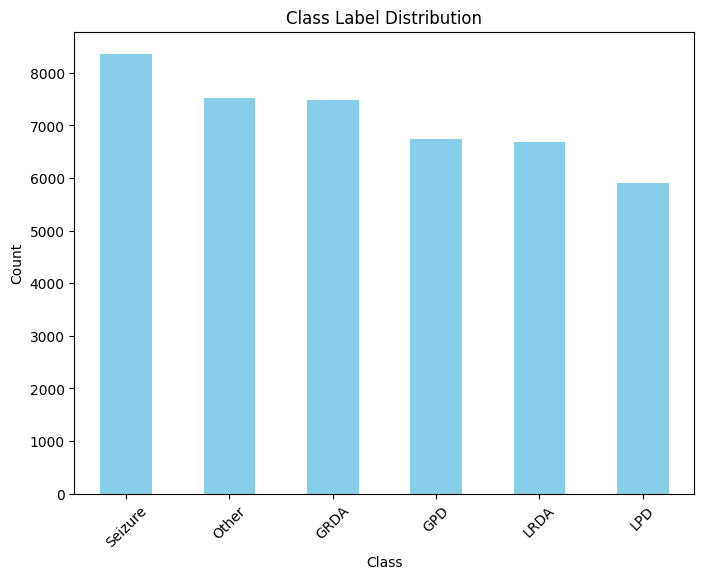

In [ ]:
# Class Label Distribution
plt.figure(figsize=(8, 6))
train_df['class_name'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Class Label Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Load EEG recording
def load_eeg_data(eeg_path):
    print(f'eeg path is {eeg_path}')
    eeg_data = pd.read_parquet(eeg_path)
    return eeg_data

In [ ]:
eeg_paths = train_df['eeg_path'].unique().tolist()
for eeg_path in eeg_paths[:6]:
    print(eeg_path)

/content/hms-harmful-brain-activity-classification/train_eegs/352705021.parquet
/content/hms-harmful-brain-activity-classification/train_eegs/1758542393.parquet
/content/hms-harmful-brain-activity-classification/train_eegs/369158057.parquet
/content/hms-harmful-brain-activity-classification/train_eegs/1840011277.parquet
/content/hms-harmful-brain-activity-classification/train_eegs/2793291056.parquet
/content/hms-harmful-brain-activity-classification/train_eegs/846467080.parquet


eeg path is /content/hms-harmful-brain-activity-classification/train_eegs/352705021.parquet


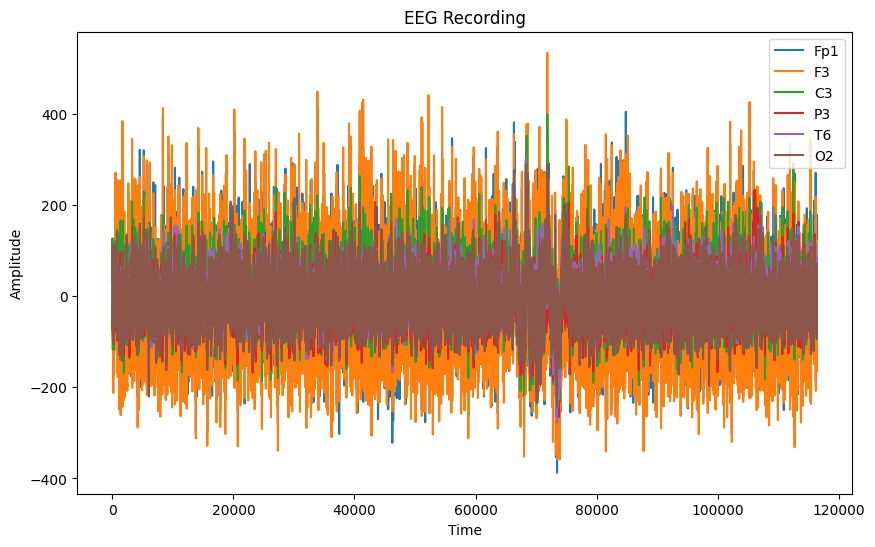

eeg path is /content/hms-harmful-brain-activity-classification/train_eegs/1758542393.parquet


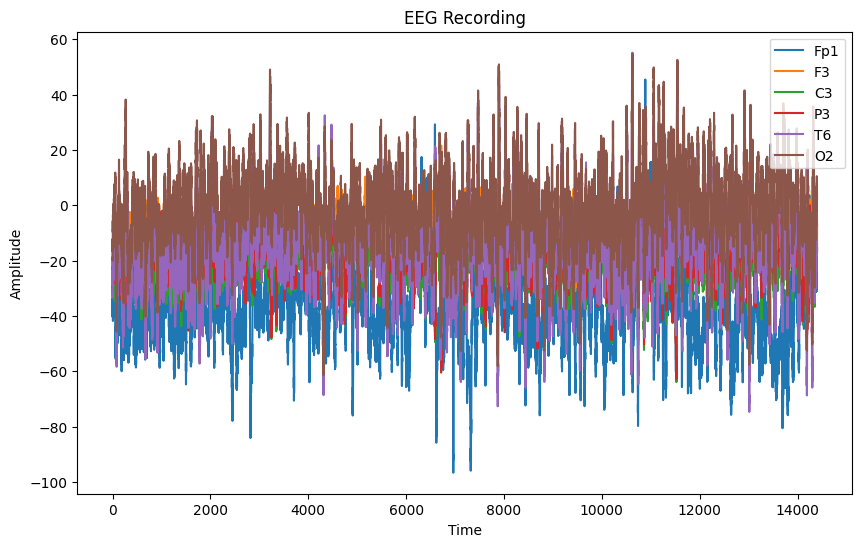

eeg path is /content/hms-harmful-brain-activity-classification/train_eegs/369158057.parquet


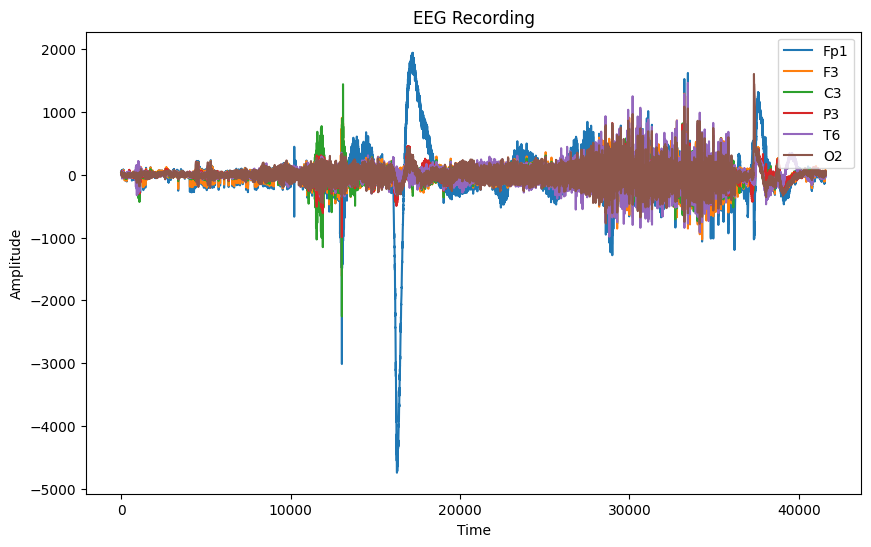

In [ ]:
eeg_paths = train_df['eeg_path'].unique().tolist()
# To do list :
# Fp1: Frontopolar 1
# F3: Frontal 3
# C3: Central 3
# P3: Parietal 3
# T6: Temporal 6
# O2: Occipital 2
names_electrode_locations = ['Fp1', 'F3', 'C3', 'P3', 'T6', 'O2']

for eeg_path in eeg_paths[:3]:
    # Load EEG data
    eeg_data = load_eeg_data(eeg_path)

    # Column names (if eeg_data is a DataFrame)
    if isinstance(eeg_data, pd.DataFrame):
        column_names = eeg_data.columns.tolist()
        #print("Column Names:", column_names)

        # Plot EEG recording
        plt.figure(figsize=(10, 6))
        #for col in column_names:
        for col in names_electrode_locations:
            plt.plot(eeg_data[col], label=col)
        plt.title('EEG Recording')
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.legend(loc="upper right")
        plt.show()
    else:
        print("Error: EEG data is not a DataFrame")

In [ ]:
import pyarrow.parquet as pq
def load_image(image_path):
    try:
        path = '/hms-harmful-brain-activity-classification/train_eegs/'
        #print(path+image_path)
        table = pq.read_table(path+image_path)
        data = np.array(table.to_pandas())
        image = data.astype(np.uint8)
        if image is not None:
            image = cv2.resize(image, (300, 400))
            image = image / 255.0
        return image
    except Exception as e:
        print(f"Error loading {image_path}: {e}")
        return None

In [ ]:
import cv2
import numpy as np
import os
import concurrent.futures

def load_preprocess_images2(path, image_paths, num_workers=2, batch_size=16):
    images = []
    with concurrent.futures.ThreadPoolExecutor(max_workers=num_workers) as executor:
        futures = []
        for i in range(0, len(image_paths), batch_size):
            batch_files = image_paths[i:i+batch_size]
            batch_futures = [executor.submit(load_image, img_file) for img_file in batch_files]
            futures.extend(batch_futures)

        for future in concurrent.futures.as_completed(futures):
            image = future.result()
            if image is not None:
                images.append(image)
    print(f'Size of images: {len(images)}')
    return np.array(images)

In [ ]:
import cv2
import pyarrow as pq

def load_preprocess_images(path,image_paths):
    images= []
    for image_path in image_paths:
        #print(f'image paths {path+image_path}')
        table = pq.parquet.read_table(path+image_path)
        data = np.array(table.to_pandas())
        image = data.astype(np.uint8)
         #print(f'image is {type(image)}')
        if image is None:
            continue
        image = cv2.resize(image,(300,400))
        image = image/255.0
        images.append(image)
        print(f'size of images {len(images)}')
    return np.array(images)

In [ ]:
import os
import warnings

warnings.filterwarnings('ignore',category=RuntimeWarning)

train_files = os.listdir(f'{BASE_PATH}/train_eegs')
path = f'{BASE_PATH}/train_eegs/'
train_images = load_preprocess_images(path,train_files)
path = f'{BASE_PATH}/test_eegs/'
test_files = os.listdir(f'{BASE_PATH}/test_eegs')
test_images = load_preprocess_images(path,test_files)

Streaming output truncated to the last 5000 lines.
size of images 12302
size of images 12303
size of images 12304
size of images 12305
size of images 12306
size of images 12307
size of images 12308
size of images 12309
size of images 12310
size of images 12311
size of images 12312
size of images 12313
size of images 12314
size of images 12315
size of images 12316
size of images 12317
size of images 12318
size of images 12319
size of images 12320
size of images 12321
size of images 12322
size of images 12323
size of images 12324
size of images 12325
size of images 12326
size of images 12327
size of images 12328
size of images 12329
size of images 12330
size of images 12331
size of images 12332
size of images 12333
size of images 12334
size of images 12335
size of images 12336
size of images 12337
size of images 12338
size of images 12339
size of images 12340
size of images 12341
size of images 12342
size of images 12343
size of images 12344
size of images 12345
size of images 12346
size

In [ ]:
train_images.shape

(17300, 400, 300)

In [ ]:
# train_labels=train_labels[:17300]

In [ ]:
# train_labels.shape

In [ ]:
# train_images.memory_usage(deep=True).sum()

In [ ]:
# train_labels.memory_usage(deep=True).sum()

In [ ]:
import matplotlib.pyplot as plt

def show_images(images, num_images=2):
    # Display a few images
    fig, axes = plt.subplots(1, num_images, figsize=(250, 200))
    for i in range(num_images):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].axis('off')
    plt.show()

show_images(train_images, num_images=2)

# DATA LOADER

In [ ]:
def build_augmenter(dim=cfg.image_size):
    augmenters = [
        keras_cv.layers.MixUp(alpha=2.0),
        keras_cv.layers.RandomCutout(height_factor=(1.0, 1.0),
                                     width_factor=(0.06, 0.1)), # freq-masking
        keras_cv.layers.RandomCutout(height_factor=(0.06, 0.1),
                                     width_factor=(1.0, 1.0)), # time-masking
    ]

    def augment(img, label):
        data = {"images":img, "labels":label}
        for augmenter in augmenters:
            if tf.random.uniform([]) < 0.5:
                data = augmenter(data, training=True)
        return data["images"], data["labels"]

    return augment


def build_decoder(with_labels=True, target_size=cfg.image_size, dtype=32):
    def decode_signal(path, offset=None):
        # Read .npy files and process the signal
        file_bytes = tf.io.read_file(path)
        sig = tf.io.decode_raw(file_bytes, tf.float32)
        sig = sig[1024//dtype:]  # Remove header tag
        sig = tf.reshape(sig, [400, -1])

        # Extract labeled subsample from full spectrogram using "offset"
        if offset is not None:
            offset = offset // 2  # Only odd values are given
            sig = sig[:, offset:offset+300]

            # Pad spectrogram to ensure the same input shape of [400, 300]
            pad_size = tf.math.maximum(0, 300 - tf.shape(sig)[1])
            sig = tf.pad(sig, [[0, 0], [0, pad_size]])
            sig = tf.reshape(sig, [400, 300])

        # Log spectrogram
        sig = tf.clip_by_value(sig, tf.math.exp(-4.0), tf.math.exp(8.0)) # avoid 0 in log
        sig = tf.math.log(sig)

        # Normalize spectrogram
        sig -= tf.math.reduce_mean(sig)
        sig /= tf.math.reduce_std(sig) + 1e-6

        # Mono channel to 3 channels to use "ImageNet" weights
        sig = tf.tile(sig[..., None], [1, 1, 3])
        return sig

    def decode_label(label):
        label = tf.one_hot(label, cfg.num_classes)
        label = tf.cast(label, tf.float32)
        label = tf.reshape(label, [cfg.num_classes])
        return label

    def decode_with_labels(path, offset=None, label=None):
        sig = decode_signal(path, offset)
        label = decode_label(label)
        return (sig, label)

    return decode_with_labels if with_labels else decode_signal


def build_dataset(paths, offsets=None, labels=None, batch_size=32, cache=True,
                  decode_fn=None, augment_fn=None,
                  augment=False, repeat=True, shuffle=1024,
                  cache_dir="", drop_remainder=False):
    if cache_dir != "" and cache is True:
        os.makedirs(cache_dir, exist_ok=True)

    if decode_fn is None:
        decode_fn = build_decoder(labels is not None)

    if augment_fn is None:
        # augment_fn = build_augmenter()
        pass

    AUTO = tf.data.experimental.AUTOTUNE
    slices = (paths, offsets) if labels is None else (paths, offsets, labels)

    ds = tf.data.Dataset.from_tensor_slices(slices)
    ds = ds.map(decode_fn, num_parallel_calls=AUTO)
    ds = ds.cache(cache_dir) if cache else ds
    ds = ds.repeat() if repeat else ds
    if shuffle:
        ds = ds.shuffle(shuffle, seed=cfg.seed)
        opt = tf.data.Options()
        opt.experimental_deterministic = False
        ds = ds.with_options(opt)
    ds = ds.batch(batch_size, drop_remainder=drop_remainder)
    ds = ds.map(augment_fn, num_parallel_calls=AUTO) if augment else ds
    ds = ds.prefetch(AUTO)
    return ds

In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_labels,test_labels = train_test_split(train_df[['eeg_path','spec_path','spec2_path']],train_df['class_label'],test_size=0.2,random_state=42)

In [ ]:
train_labels=train_labels[:17300]

In [ ]:
train_images_reshaped = np.expand_dims(train_images, axis=-1)

print(f'train data {train_images_reshaped.shape}')

train data (17300, 400, 300, 1)


In [ ]:
train_images_reshaped = np.repeat(train_images_reshaped,3,axis=1)

In [ ]:
print(f'train data {train_images_reshaped.shape}')

In [ ]:
print(f"train_labels shape: {train_labels.shape}")

In [ ]:
print("Shape of train_images:", train_images.shape)
val_images_reshaped = np.expand_dims(train_images, axis=-1)

print(f'test data {val_images_reshaped.shape}')

## Modal Building

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(filters=4,kernel_size=(3,3),activation='relu',input_shape=(400,300,3)))

In [ ]:
model.add(Conv2D(filters=4,kernel_size=(3,3),activation='relu',input_shape=(400,300,3)))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(cfg.num_classes,activation='softmax'))
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(train_images_reshaped,train_labels,epochs=cfg.epochs,
                    batch_size=cfg.batch_size,validation_data=(val_images_reshaped,test_labels))

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)

In [ ]:
# Build Classifier
model = keras_cv.models.ImageClassifier.from_preset(
    CFG.preset, num_classes=CFG.num_classes
)


In [ ]:
# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
              loss=LOSS)

# Model Sumamry
model.summary()

# Performance Metrics for Classification
## Accuracy
## ROC/Area Under Curve(AUC)
## F1 Score(Precision/Recall)
## Cross-Entropy(Neg Log Loss)
##

## Evaluation and Metric

In [ ]:
ckpt_cb = keras.callbacks.ModelCheckpoint("best_model.keras",
                                         monitor='val_loss',
                                         save_best_only=True,
                                         save_weights_only=False,
                                         mode='min')

In [ ]:
history = model.fit(
    train_ds,
    epochs=CFG.epochs,
    callbacks=[lr_cb, ckpt_cb],
    steps_per_epoch=len(train_df)//CFG.batch_size,
    validation_data=valid_ds,
    verbose=CFG.verbose
)

In [ ]:
test_paths = test_df.spec2_path.values
test_ds = build_dataset(test_paths, batch_size=min(CFG.batch_size, len(test_df)),
                         repeat=False, shuffle=False, cache=False, augment=False)

In [ ]:
pred_df = test_df[["eeg_id"]].copy()
target_cols = [x.lower()+'_vote' for x in CFG.class_names]
pred_df[target_cols] = preds.tolist()

sub_df = pd.read_csv(f'{BASE_PATH}/sample_submission.csv')
sub_df = sub_df[["eeg_id"]].copy()
sub_df = sub_df.merge(pred_df, on="eeg_id", how="left")
sub_df.to_csv("submission.csv", index=False)
sub_df.head()

## Visualization

In [ ]:
import math

def get_lr_callback(batch_size=8, mode='cos', epochs=10, plot=False):
    lr_start, lr_max, lr_min = 5e-5, 6e-6 * batch_size, 1e-5
    lr_ramp_ep, lr_sus_ep, lr_decay = 3, 0, 0.75

    def lrfn(epoch):  # Learning rate update function
        if epoch < lr_ramp_ep: lr = (lr_max - lr_start) / lr_ramp_ep * epoch + lr_start
        elif epoch < lr_ramp_ep + lr_sus_ep: lr = lr_max
        elif mode == 'exp': lr = (lr_max - lr_min) * lr_decay**(epoch - lr_ramp_ep - lr_sus_ep) + lr_min
        elif mode == 'step': lr = lr_max * lr_decay**((epoch - lr_ramp_ep - lr_sus_ep) // 2)
        elif mode == 'cos':
            decay_total_epochs, decay_epoch_index = epochs - lr_ramp_ep - lr_sus_ep + 3, epoch - lr_ramp_ep - lr_sus_ep
            phase = math.pi * decay_epoch_index / decay_total_epochs
            lr = (lr_max - lr_min) * 0.5 * (1 + math.cos(phase)) + lr_min
        return lr

    if plot:  # Plot lr curve if plot is True
        plt.figure(figsize=(10, 5))
        plt.plot(np.arange(epochs), [lrfn(epoch) for epoch in np.arange(epochs)], marker='o')
        plt.xlabel('epoch'); plt.ylabel('lr')
        plt.title('LR Scheduler')
        plt.show()

    return keras.callbacks.LearningRateScheduler(lrfn, verbose=False)  # Create lr callback

In [ ]:
lr_cb = get_lr_callback(CFG.batch_size, mode=CFG.lr_mode, plot=True)

# Reference

https://www.kaggle.com/code/tarndeepsingh16/hms-harmful-brain-activity-classification/notebook

## Conclusion